In [1]:
import numpy as np
import pandas as pd

In [2]:
#Conjunto de dados Cancer de mama
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()

In [7]:
#Carrega o conjunto de dados na memória
breast_data = pd.DataFrame(breast.data, columns=breast.feature_names)

In [8]:
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [10]:
breast_data.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
 #importação de bibliotecas:
import seaborn as sns
import matplotlib.pyplot as plt

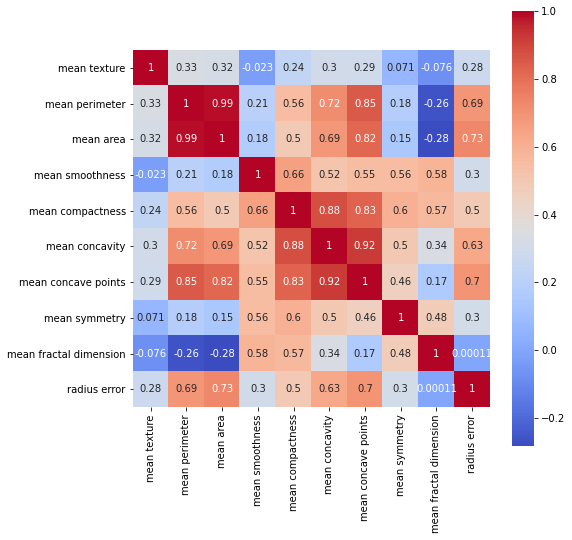

In [14]:
# calcula a correlação entre os 10 primeiros atributos do conjunto de dados
plt.figure(figsize=(8, 8))
atrib_medias = breast_data.columns[1:11]
m_corr = breast_data[atrib_medias].corr()
sns.heatmap(m_corr, cmap='coolwarm', annot=True, square=True)

apresenta o mapa de calor da correlação dos 10 primeiros atributos.
Nesse mapa, as cores mais quentes mostram um grau mais forte de correlação entre
dois atributos, como o perímetro e o raio. A correlação mais fraca é indicada pelas
cores mais frias, como na relação entre os atributos área e dimensão fractal

In [18]:
#cria um DataFrame para os rótulos e associá-los com as classes.
labels = pd.DataFrame(breast.target, columns=['class'])
labels_class = labels['class'].map({0: 'maligno', 1: 'benigno'})


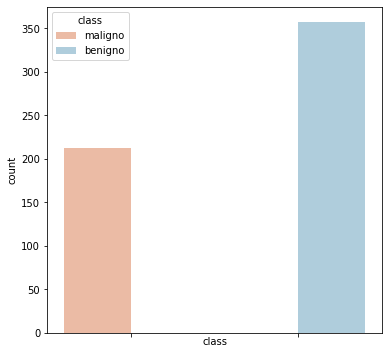

In [20]:
#observação da distribuição dos valores de classe no gráfico de barras:
plt.figure(figsize=(6, 6))
plt.tick_params(labelbottom=False)
sns.countplot(data=labels, x='class', hue=labels_class,
palette=sns.color_palette('RdBu', 2))

In [21]:
#Outra forma de observar a distribuição é verificando a quantidade exata de registros em cada classe
labels['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

Analise do conjunto de atributos em relação à classe

In [23]:
#Inclusão da classe no conjunto de dados
breast_data['class'] = labels

<Figure size 432x432 with 0 Axes>

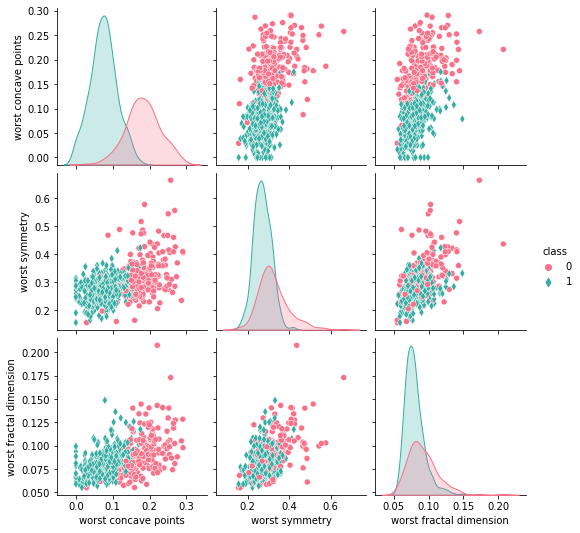

In [24]:
#selecionando os últimos 3 atributos do conjunto de dados e plotando os relacionamentos emparelhados do conjunto de dados
atrib_3ultimos = breast_data.columns[27:31]
plt.figure(figsize=(6, 6))
sns.pairplot(breast_data[atrib_3ultimos], hue='class', palette='husl',
markers=['o', 'd'])

Algumas relações são observadas, são elas:

• As classes (0 e 1, vermelho e azul) aparecem com rara sobreposição nos gráficos de dispersão, indicando que os objetos do conjunto de dados podem ser
facilmente discriminados. Por exemplo, a maior parte dos objetos do gráfico
“simetria x pontos côncavos” pode ser separada por uma única reta;

• Nos gráficos de densidade apresentados na diagonal principal, a sobreposição
de classes acontece na análise univariada dos atributos. O atributo “dimensão
fractal”, por exemplo, apresenta medidas estatísticas muito semelhantes entre as
classes (Figura 12), podendo impedir que elas sejam discriminadas unicamente
por esse atributo

In [25]:
#Medidas estatísticas agrupadas por classe
breast_data.groupby('class').describe()['worst fractal dimension']

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,212.0,0.091530,0.021553,0.05504,0.076302,0.08760,0.102625,0.2075
1,357.0,0.079442,0.013804,0.05521,0.070090,0.07712,0.085410,0.1486
